# V243 Thermisches Rauschen

## Auswertung der Messergebnisse

In [1]:
#Benötigte Pakete
import numpy as np
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from scipy.stats import chi2
import matplotlib.pyplot as plt
%matplotlib inline 

plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 7
plt.rcParams['errorbar.capsize']=2

### Teil 1: Vorversuch

Die qualitativen Untersuchungen die im Vorversuch durchgeführt worden sind, werden im Protokollheft ausführlich dokumentiert.

### Teil 3: Messung des Frequenzgangs des Verstärkers und des Bandfilters

In [2]:
#Importieren der Messdaten
freq, U_aus=np.loadtxt('Messdaten/V243Messdaten.txt', skiprows=1, usecols=(0,1), unpack=True)

freq_err=50e-6*freq
U_aus_err=0.03*U_aus

#Abschwächung des Dämpfungsglieds
D=1e-3
D_err=0.002*D

#Eingangsspannung
U_ein=0.2  #Volt   
U_ein_err=0.03*U_ein 

#Frequenzgang g(freq)
g=U_aus/(U_ein*D)
g_err=g*np.sqrt((U_aus_err/U_aus)**2+(D_err/D)**2+(U_ein_err/U_ein)**2)

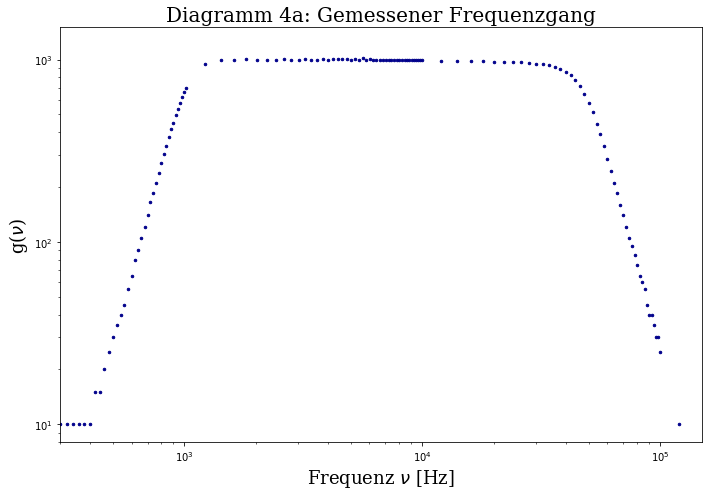

In [3]:
#Plot der Messdaten
plt.loglog(freq,g,linestyle=' ', marker='.',markersize=5, color='darkblue')
plt.axis([3e2,1.5e5,8,1.5E3])
plt.xlabel(r'Frequenz $\nu$ [Hz]',size=18)
plt.ylabel(r'g($\nu$)',size=18)
plt.title('Diagramm 4a: Gemessener Frequenzgang',size=20)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V243Diagramm4a.pdf', format='PDF')

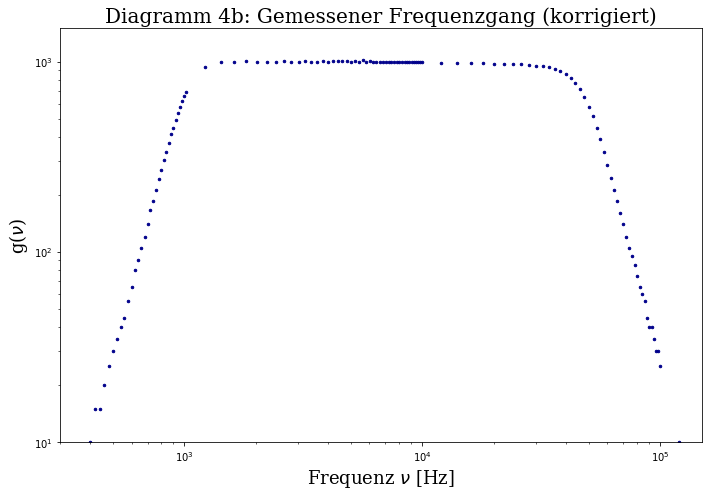

In [4]:
#Plot der Messdaten ohne störende Randwerte

plt.loglog(freq[15:138],g[15:138],linestyle='None', marker='.',markersize=5, color='darkblue')
plt.axis([3e2,1.5e5,10,1.5E3])
plt.xlabel(r'Frequenz $\nu$ [Hz]',size=18)
plt.ylabel(r'g($\nu$)',size=18)
plt.title('Diagramm 4b: Gemessener Frequenzgang (korrigiert)',size=20)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V243Diagramm4b.pdf', format='PDF')

In [5]:
#Fit der theoretischen Kurve an unsere Messdaten
def fit_function(freq,V,W1,W2,n1,n2):
    return V/(np.sqrt(1+1/(freq/W1)**(2*n1))*np.sqrt(1+(freq/W2)**(2*n2)))

#Startwerte:
#Verstärkung V=1000, untere Grenzfrequenz W1= 1000, obere Grenzfrequenz W2= 50000

p0= [1000, 1000, 50000, 5, 5]

#Achtung: passende Grenzen von f auswählen

popt1,pcov1= curve_fit(fit_function, freq[15:138],g[15:138], p0)

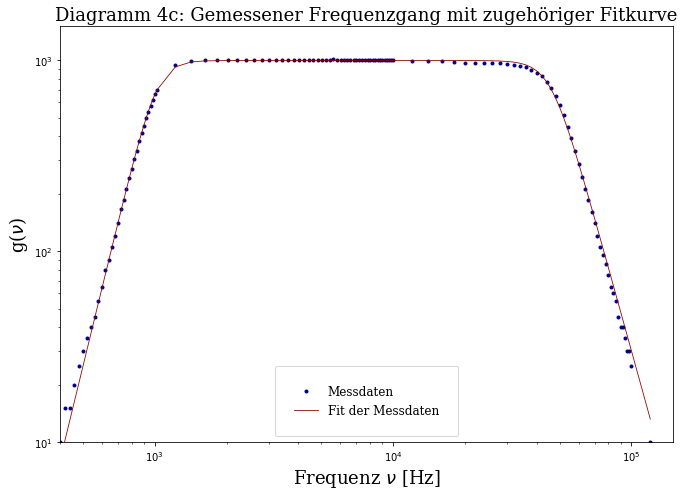

In [6]:
#Plot der Messdaten inklusive Fit 

plt.loglog(freq[15:138],g[15:138],linestyle=' ', marker='o', label='Messdaten',color='darkblue',markersize=3)
plt.loglog(freq[15:138],fit_function(freq[15:138],*popt1), label='Fit der Messdaten',color='darkred',linewidth=0.8)
plt.axis([4e2,1.5e5,10,1.5E3])
plt.xlabel(r'Frequenz $\nu$ [Hz]',size=18)
plt.ylabel(r'g($\nu$)',size=18)
plt.title('Diagramm 4c: Gemessener Frequenzgang mit zugehöriger Fitkurve',size=18)
plt.legend(frameon=True,loc='best',fontsize='large', borderpad=1.6, borderaxespad=0.5)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V243Diagramm4c.pdf', format='PDF')

#### Numerische Integration

In [7]:
def fit_function_squared(freq,V,W1,W2,n1,n2):
    return fit_function(freq,V,W1,W2,n1,n2)**2


B=integrate.quad(fit_function_squared, freq[15], freq[138], args=tuple(popt1))
print('Das Integral liefert den Wert: {value:.4e}'.format(value=B[0]))

Das Integral liefert den Wert: 4.5372e+10


#### Teil 2: Bestimmung der Boltzmann-Konstanten aus der gemessenen Rauschspannung

In [8]:
#Widerstand und gemessene Rauschspannung

R=np.array([5e3, 10e3, 15e3, 20e3, 25e3, 30e3])

U_aus=np.array([2.4278,3.1351,3.7142,4.2181,4.6732,5.0907])*1e-3 #Volt
U_aus_err=np.array([0.00915/np.sqrt(115),0.0111/np.sqrt(108),0.0136/np.sqrt(107),0.0168/np.sqrt(107),0.0196/np.sqrt(111),0.0191/np.sqrt(109)])*1e-3 

U_V=1.3962e-3
U_V_err=(0.00532/np.sqrt(114))*1e-3

diff_U=U_aus**2-U_V**2
diff_U_err=np.sqrt((2*U_aus*U_aus_err)**2+(2*U_V*U_V_err)**2)

Aus dem linearen Fit erhalten wir: 
c = 7.95287294764e-10 +/- 1.5920283136e-12


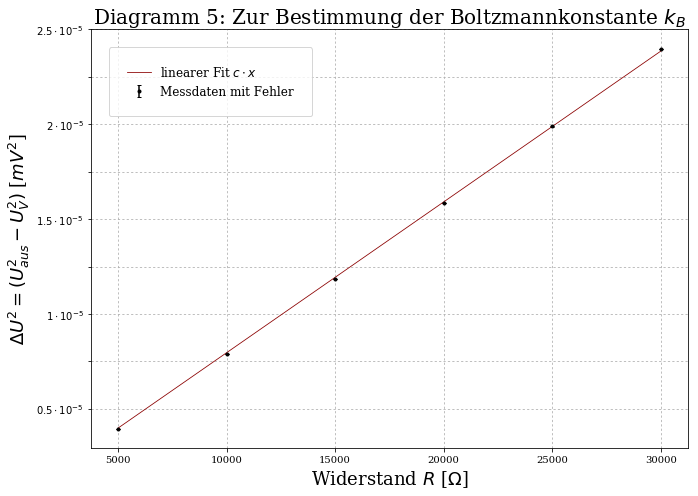

In [9]:
#linearer Fit
def linear(x,c):
    return c*x

popt2,pcov2= curve_fit(linear,R,diff_U)

#Plot der Messdaten mit linearem Fit
plt.errorbar(R,diff_U, yerr=diff_U_err, fmt='.', color='black', label='Messdaten mit Fehler')
plt.plot(R,linear(R,*popt2), linewidth=0.8, color='darkred', label=r'linearer Fit $c\cdot x$')
plt.xlabel(r'Widerstand $R$ [$\Omega$]',size=18)
plt.ylabel(r'$∆U^2=(U_{aus}^2-U_V^2)$ [$mV^2$]',size=18)
plt.yticks([5e-6,7.5e-6,1e-5,1.25e-5,1.5e-5,1.75e-5,2e-5,2.25e-5,2.5e-5],
           ['$0.5\cdot10^{-5}$','','$1\cdot10^{-5}$','','$1.5\cdot10^{-5}$','','$2\cdot10^{-5}$','','$2.5\cdot10^{-5}$'])
plt.title(r'Diagramm 5: Zur Bestimmung der Boltzmannkonstante $k_B$',size=20)
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='large',loc='best', borderpad=1.5, borderaxespad=1.5)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V243Diagramm5.pdf', format='PDF')

print('Aus dem linearen Fit erhalten wir: ')
print('c = ' + str(popt2[0]) + ' +/- ' + str(pcov2[0,0]**0.5))

In [10]:
#Güte des Fits
chi_squared=np.sum((linear(R,*popt2)-diff_U)**2/diff_U_err**2)

#Freiheitsgrade
dof=5

chi_squared_red=chi_squared/dof

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared))
print('chi_squared_red= ' + str(chi_squared_red))
print()

#Fitwahrscheinlichkeit
prob=round(1-chi2.cdf(chi_squared,dof),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 292.775106082
chi_squared_red= 58.5550212165

Die Fitwahrscheinlichkeit beträgt: 0.0 %


In [11]:
#Theorie: c=4kTB

T=273.15+24.1 #K
T_err=0.2

#Fehler für B abschätzen (systematisch) 
B_err=0.02*B[0]

k=popt2[0]/(4*B[0]*T)
k_err=k*np.sqrt((pcov2[0,0]**0.5/popt2[0])**2+(B_err/B[0])**2+(T_err/T)**2)
k_std=k*(pcov2[0,0]**0.5/popt2[0])

#Literaturwert
k_lit=1.381e-23

#Differenz Messwert-Literatur
diff_k=np.abs(k-k_lit)

print('Aus unseren Messwerten folgt für die Boltzmannkonstante:')
print('k = ' + str(k) + ' +/- ' + str(k_err) + ' +/- ' + str(k_std))
print()
print('Im Vergleich zum Literaturwert bedeutet das:')
print('∆k = ' + str(diff_k) + ' +/- ' + str(k_err) + ' +/- ' + str(k_std))

Aus unseren Messwerten folgt für die Boltzmannkonstante:
k = 1.47420237074e-23 +/- 2.96479660961e-25 +/- 2.95109947015e-26

Im Vergleich zum Literaturwert bedeutet das:
∆k = 9.32023707434e-25 +/- 2.96479660961e-25 +/- 2.95109947015e-26


Damit liegen unser Messwert und die Literturangabe im $4 \sigma$ - Intervall und sind signifikant verschieden!

###  ZUSATZ: Teil 4: Messung der Rauschspannung als Funktion der Temperatur

In [12]:
# Wir wissen: diff_U/R= c'*T wobei c'=4kB

U_aus2=np.array([2.4876,2.7332,3.0024,3.2733,3.569])*1e-3
U_aus2_err=np.array([0.00992/np.sqrt(103),0.0103/np.sqrt(103),0.0122/np.sqrt(105),0.0123/np.sqrt(104),0.0138/np.sqrt(104),])*1e-3

#Verstärkerrauschen analog zum vorherigen Aufgabenteil U_V
diff_U2=U_aus2**2-U_V**2
diff_U2_err=np.sqrt((2*U_aus2*U_aus2_err)**2+(2*U_V*U_V_err)**2)

#Für Widerstand und Temperatur wird jeweils der Mittelwert aus den beiden gemessenen Werten gebildet
R1=np.array([4831.0,5544.5,6293.6,7023.1,7810.0]) #Ohm
R2=np.array([4832.8,5545.7,6297.5,7024.2,7802.0]) #Ohm

R_mean=[]
R_std=[]
for i in range(5):
    R_mean.append(np.mean([R1[i],R2[i]]))
    R_std.append(np.std([R1[i],R2[i]])/np.sqrt(2))

T1=np.array([53.58,100.28,150.05,199.23,253.22])+273.15*np.ones(5) #K
T2=np.array([53.70,100.36,150.35,199.33,252.60])+273.15*np.ones(5) #K

T_mean=[]
T_std=[]
for i in range(5):
    T_mean.append(np.mean([T1[i],T2[i]]))
    T_std.append(np.std([T1[i],T2[i]])/np.sqrt(2))
    
R_mean=np.array(R_mean)
T_mean=np.array(T_mean)

Aus dem linearen Fit erhalten wir: 
a = 2.6508548076e-12 +/- 9.37870703597e-15


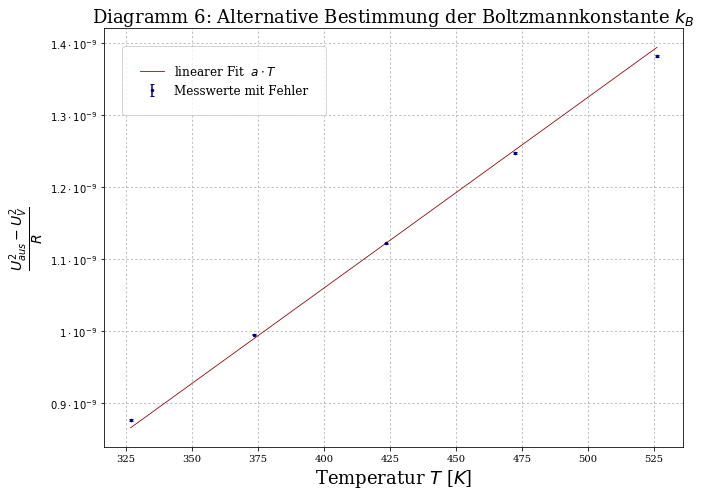

In [13]:
#grafische Darstellung
y=(U_aus2**2-(U_V**2)*np.ones(5))/R_mean
y_err=np.sqrt((2*U_aus2*U_aus2_err/R_mean)**2+(2*U_V*np.ones(5)*U_V_err/R_mean)**2+((U_aus2**2-(U_V**2)*np.ones(5))*R_std/R_mean**2)**2)    
 
#Fitfunktion für Aufgabe a)
def fit_function2(a,T):
    return a*T

popt3,pcov3=curve_fit(fit_function2,T_mean,y,sigma=y_err)

#Plot der Daten und alternative Bestimmung von k
plt.errorbar(T_mean,y,yerr=y_err,linestyle=' ', marker='.',markersize=5, color='darkblue',label='Messwerte mit Fehler')
plt.plot(T_mean,fit_function2(T_mean,*popt3),color='darkred', linewidth=0.8,label=r'linearer Fit $\ a\cdot T$')
plt.title(r'Diagramm 6: Alternative Bestimmung der Boltzmannkonstante $k_B$',size=18)
plt.xlabel(r'Temperatur $T$ [$K$]',size=18)
plt.ylabel(r'$\frac{U_{aus}^2-U_V^2}{R}$', size=20)
plt.yticks([0.9e-9,1e-9,1.1e-9,1.2e-9,1.3e-9,1.4e-9],
           ['$0.9\cdot10^{-9}$','$1\cdot10^{-9}$','$1.1\cdot10^{-9}$','$1.2\cdot10^{-9}$','$1.3\cdot10^{-9}$','$1.4\cdot10^{-9}$'])
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='large',loc='best', borderpad=1.5, borderaxespad=1.5)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V243Diagramm6.pdf', format='PDF')

print('Aus dem linearen Fit erhalten wir: ')
print('a = ' + str(popt3[0]) + ' +/- ' + str(pcov3[0,0]**0.5))

In [14]:
#Güte des Fits
chi_squared2=np.sum((fit_function2(T_mean,*popt3)-y)**2/y_err**2)

#Freiheitsgrade
dof2=4

chi_squared2_red=chi_squared2/dof2

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared2))
print('chi_squared_red= ' + str(chi_squared2_red))
print()

#Fitwahrscheinlichkeit
prob2=round(1-chi2.cdf(chi_squared2,dof2),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob2) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 238.55771369
chi_squared_red= 59.6394284224

Die Fitwahrscheinlichkeit beträgt: 0.0 %


Aus dem linearen Fit erhalten wir: 
a = 2.53754525949e-12 +/- 4.98088880556e-15
T0 = -4.80870955835e-11 +/- 2.08559863142e-12 K


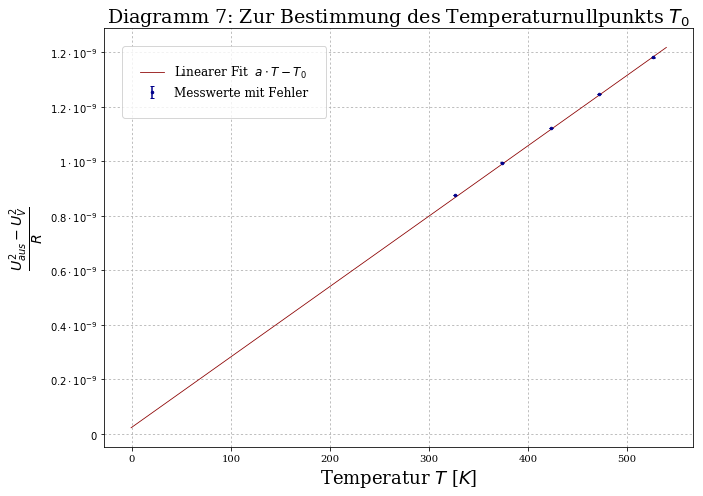

In [15]:
#Teil b: Steigung und Nullpunkt als freie Parameter

#Fitfunktion für Aufgabe b)
def fit_function3(a,T,T0):
    return a*T-T0
popt4,pcov4=curve_fit(fit_function3,T_mean,y,sigma=y_err)

#Plot der Daten
plt.errorbar(T_mean,y,yerr=y_err,linestyle=' ', marker='.',markersize=5, color='darkblue',label='Messwerte mit Fehler')
plt.plot(np.linspace(-1,540,100),fit_function3(np.linspace(-10,540,100),*popt4),color='darkred',label='Linearer Fit $ \ a\cdot T-T_0$', linewidth=0.8)
plt.title(r'Diagramm 7: Zur Bestimmung des Temperaturnullpunkts $T_0$',size=19)
plt.xlabel(r'Temperatur $T$ [$K$]',size=18)
plt.ylabel(r'$\frac{U_{aus}^2-U_V^2}{R}$', size=20)
plt.yticks([0e-9,0.2e-9,0.4e-9,0.6e-9,0.8e-9,1e-9,1.2e-9,1.4e-9],
           ['$0$','$0.2\cdot10^{-9}$','$0.4\cdot10^{-9}$','$0.6\cdot10^{-9}$','$0.8\cdot10^{-9}$','$1\cdot10^{-9}$','$1.2\cdot10^{-9}$','$1.2\cdot10^{-9}$'])
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='large',loc='best', borderpad=1.5, borderaxespad=1.5)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V243Diagramm7.pdf', format='PDF')

print('Aus dem linearen Fit erhalten wir: ')
print('a = ' + str(popt4[0]) + ' +/- ' + str(pcov4[0,0]**0.5))
print('T0 = ' + str(popt4[1]) + ' +/- ' + str(pcov4[1,1]**0.5) + ' K')

In [17]:
#Güte des Fits
chi_squared3=np.sum((fit_function3(T_mean,*popt4)-y)**2/y_err**2)

#Freiheitsgrade
dof3=3

chi_squared3_red=chi_squared3/dof3

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared3))
print('chi_squared_red= ' + str(chi_squared3_red))
print()

#Fitwahrscheinlichkeit
prob3=round(1-chi2.cdf(chi_squared3,dof3),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob3) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 1.3386739847
chi_squared_red= 0.446224661565

Die Fitwahrscheinlichkeit beträgt: 72.0 %
